In [1]:
include("longbonds.jl")

using .LongBondsCT

using Plots 

pgfplotsx();

In [45]:
_BV_TOL = 10.0^(-12);
_ODE_TOL = (abstol=10.0^(-6), reltol=10.0^(-6));

In [46]:
figs = []
mypush!(f) = (push!(figs, f);f);

## An example simulation

In [47]:
m = LongBondModel(δ=BigFloat(0.2)); # using high precision

In [48]:
sol = solve_equilibrium(m, bv_tol=_BV_TOL, ode_tol=_ODE_TOL);

In [49]:
eff = solve_efficient(m, ode_tol=_ODE_TOL);

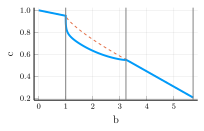

In [50]:
mypush!(plot_c(sol))

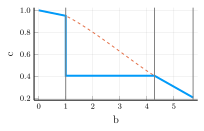

In [51]:
mypush!(plot_c(eff))

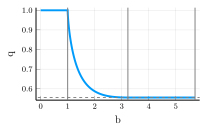

In [52]:
mypush!(plot_q(sol))

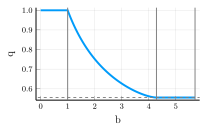

In [53]:
mypush!(plot_q(eff))

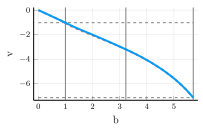

In [54]:
plot_v(sol)

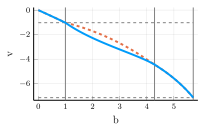

In [55]:
plot_v(eff)

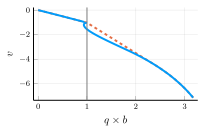

In [56]:
bindex = findlast(b -> b < sol.b̲, sol.b)

f = plot([q * b for (q, b) in zip(eff.q, eff.b)], eff.v, line=(2, :dash), color=2, legend=false)
plot!(f, [q * b for (q, b) in zip(sol.q[1:bindex], sol.b[1:bindex])], sol.v[1:bindex], line=(2), color=1)
plot!(f, [q * b for (q, b) in zip(sol.q[bindex+1:end], sol.b[bindex+1:end])], sol.v[bindex+1:end], line=(2), color=1)
plot!(f, size=(300,200), xlabel="\$ q\\times b\$", ylabel="\$v\$")
vline!(f, [sol.b̲], line=(1,  :gray))
mypush!(f)

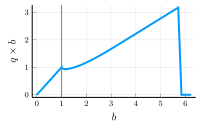

In [57]:
diff = sol.b[end] - sol.b[end-1]
f = plot(
    vcat(
        sol.b, 
        [sol.b[end] + i * diff for i in range(1, 4, step=1)]
        ), 
    vcat(
        [q * b for (q, b) in zip(sol.q, sol.b)], 
        [0.0 for i in range(1, 4, step=1)]
        ), 
    line=(2), 
    color=1)
plot!(f, legend=false)
plot!(f, size=(300,200), ylabel="\$q\\times b\$", xlabel="\$b\$")
vline!(f, [sol.b̲], line=(1,  :gray))
mypush!(f)

### With a shorter maturity

In [58]:
m2 = LongBondModel(δ=BigFloat(3.0))
eqm2 = solve_equilibrium(m2, bv_tol=_BV_TOL, ode_tol=_ODE_TOL);

In [59]:
eff2 = solve_efficient(m2, ode_tol=_ODE_TOL);

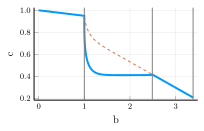

In [60]:
plot_c(eqm2)

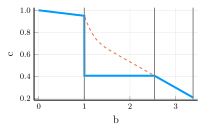

In [61]:
plot_c(eff2)

## Very Long Maturity

In [62]:
m3 = LongBondModel(δ=BigFloat(0.001))
eqm3 = solve_equilibrium(m3, bv_tol=_BV_TOL, ode_tol=_ODE_TOL);

In [63]:
eff3 = solve_efficient(m3, ode_tol=_ODE_TOL);

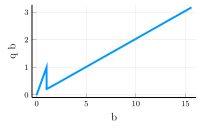

In [64]:
f = plot(eqm3.b, [q * b for (q, b) in zip(eqm3.q, eqm3.b)], line=(2), color=1)
plot!(f, legend=false)
plot!(f, size=(300,200), ylabel="q b", xlabel="b")
f

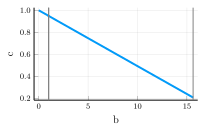

In [65]:
plot_c(eqm3)

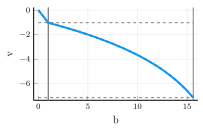

In [66]:
plot_v(eqm3)

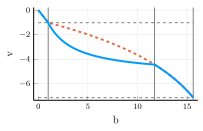

In [67]:
plot_v(eff3)

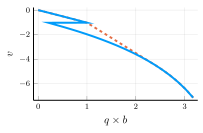

In [68]:
f = plot([q * b for (q, b) in zip(eff3.q, eff3.b)], eff3.v, line=(2, :dash), color=2, legend=false)
plot!(f, [q * b for (q, b) in zip(eqm3.q, eqm3.b)], eqm3.v, line=(2), color=1)
plot!(f, size=(300,200), xlabel="\$q \\times b\$", ylabel="\$v\$")
f

## Several Maturities

┌ Info: currently running
│   δ = 0.02
└ @ Main In[69]:4
┌ Info: currently running
│   δ = 0.1
└ @ Main In[69]:4
┌ Info: currently running
│   δ = 0.3
└ @ Main In[69]:4
┌ Info: currently running
│   δ = 0.7
└ @ Main In[69]:4


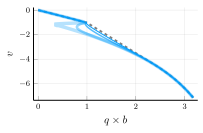

In [69]:
eff = solve_efficient(LongBondModel(δ=BigFloat(0.1)), ode_tol=_ODE_TOL)
f = plot([q*b for (q, b) in zip(eff.q, eff.b)], eff.v, legend=false, line=(2, :dash, :gray))
for (δ, w) in zip((0.02, 0.1, 0.3, 0.7), (3.5, 2.5, 1.5, 1.))
    @info "currently running" δ
    sol = solve_equilibrium(LongBondModel(δ=BigFloat(δ)), bv_tol=_BV_TOL, ode_tol=_ODE_TOL)
    bindex = findlast(b -> b < sol.b̲, sol.b)
    plot!(f, [q * b for (q, b) in zip(sol.q[1:bindex], sol.b[1:bindex])], sol.v[1:bindex], line=(w), alpha=1/w, color=1)
    plot!(f, [q * b for (q, b) in zip(sol.q[bindex+1:end], sol.b[bindex+1:end])], sol.v[bindex+1:end], line=(w), alpha=1/w, color=1)
end
plot!(f, size=(300,200), xlabel="\$q \\times b\$", ylabel="\$v\$")
mypush!(f)

## Saving the results

In [25]:
for (index, f) in enumerate(figs)
    savefig(f, "figures/fig_LTB_ODE_" * string(index) * ".pdf")
end